<a href="https://colab.research.google.com/github/DrewShapiro5/WCA_Data_Analysis/blob/main/WCA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the file from google drive containing all WCA results since Feb 17 2025

In [2]:
import gdown

file_id = "1ja996qL_jmm_1hdeTLuDLMRpIStguzFc"
file_path = "WCA_export.tsv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ja996qL_jmm_1hdeTLuDLMRpIStguzFc
From (redirected): https://drive.google.com/uc?id=1ja996qL_jmm_1hdeTLuDLMRpIStguzFc&confirm=t&uuid=fbba09ae-af02-4e27-97f8-583a0bf6df92
To: /content/WCA_export.tsv
100%|██████████| 582M/582M [00:05<00:00, 98.4MB/s]


'WCA_export.tsv'

Turn the file into a dataframe.

Look at the top and bottom of the data.

In [3]:
cube_df = pd.read_csv(file_path, sep='\t')
cube_df.head(10)

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,formatId,value1,value2,value3,value4,value5,regionalSingleRecord,regionalAverageRecord,personCountryId
0,LyonOpen2007,333,1,15,1968,2128,Etienne Amany,2007AMAN01,a,1968,2203,2138,2139,2108,AfR,AfR,Cote d_Ivoire
1,LyonOpen2007,333,1,16,1731,2140,Thomas Rouault,2004ROUA01,a,2222,2153,1731,2334,2046,NaN,NaN,France
2,LyonOpen2007,333,1,17,2305,2637,Antoine Simon-Chautemps,2005SIMO01,a,3430,2581,2540,2789,2305,NaN,NaN,France
3,LyonOpen2007,333,1,18,2452,2637,Irène Mallordy,2007MALL01,a,2715,2452,2868,2632,2564,NaN,NaN,France
4,LyonOpen2007,333,1,19,2677,2906,Marlène Desmaisons,2007DESM01,a,2921,3184,2891,2677,2907,NaN,NaN,France
5,LyonOpen2007,333,1,20,1869,2910,Ton Dennenbroek,2003DENN01,a,3309,1869,2558,2930,3241,NaN,NaN,Netherlands
6,LyonOpen2007,333,1,21,2411,2910,Arnaud van Galen,2006GALE01,a,2530,2696,2411,5512,3503,NaN,NaN,Netherlands
7,LyonOpen2007,333,1,22,2385,3111,Cyrille Cornu,2007CORN01,a,2844,3861,2628,3885,2385,NaN,NaN,France
8,LyonOpen2007,333,1,23,2639,3111,Christophe Woittequand,2005WOIT01,a,3084,3163,3087,3498,2639,NaN,NaN,France
9,LyonOpen2007,333,1,24,2687,3265,Georges Poinsot,2007POIN01,a,3387,3034,3373,3430,2687,NaN,NaN,France


In [4]:
cube_df.tail(10)

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,formatId,value1,value2,value3,value4,value5,regionalSingleRecord,regionalAverageRecord,personCountryId
5307561,XMUMCubeOpen2025,sq1,f,7,812,1352,Tristan Chua Yong,2016YONG02,a,1651,1311,812,1152,1592,NaN,NaN,Singapore
5307562,XMUMCubeOpen2025,sq1,f,8,1102,1414,Nordarwish Akmal Bin Noor Ibrahim,2019IBRA02,a,1518,1254,1470,1787,1102,NaN,NaN,Malaysia
5307563,XMUMCubeOpen2025,sq1,f,9,1132,1441,Arif Imran Bin Arifin,2019ARIF06,a,1543,1453,1349,1132,1520,NaN,NaN,Malaysia
5307564,XMUMCubeOpen2025,sq1,f,10,1333,1449,Mohamad Adrian Syahirin Bin Mohd Faizal,2017FAIZ01,a,1342,1594,1410,1333,1601,NaN,NaN,Malaysia
5307565,XMUMCubeOpen2025,sq1,f,11,1217,1549,Charlize Tam Shi Kei (谭旭淇),2022KEIC01,a,1447,1903,1606,1217,1594,NaN,NaN,Malaysia
5307566,XMUMCubeOpen2025,sq1,f,12,1284,1576,Lim Chun Yik (林峻毅),2018YIKL01,a,1734,1608,1387,1284,1742,NaN,NaN,Malaysia
5307567,XMUMCubeOpen2025,sq1,f,13,1412,1888,Tan E Yan,2024YANT03,a,2342,1514,1412,2743,1807,NaN,NaN,Malaysia
5307568,XMUMCubeOpen2025,sq1,f,14,1280,1960,Muhammad Harith Bin Ahmad Hizad,2022HIZA02,a,2205,2283,1699,1975,1280,NaN,NaN,Malaysia
5307569,XMUMCubeOpen2025,sq1,f,15,1762,2139,Muhammad Shaheem Bin Muhammad Rubaie,2022RUBA01,a,2128,2437,1853,-1,1762,NaN,NaN,Malaysia
5307570,XMUMCubeOpen2025,sq1,f,16,1430,2272,Wong Chong Wen (黄崇文),2014WENW01,a,2190,2543,1430,2512,2113,NaN,NaN,Singapore


In [5]:
cube_df.shape

(5307571, 17)

In [6]:
cube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307571 entries, 0 to 5307570
Data columns (total 17 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   competitionId          object
 1   eventId                object
 2   roundTypeId            object
 3   pos                    int64 
 4   best                   int64 
 5   average                int64 
 6   personName             object
 7   personId               object
 8   formatId               object
 9   value1                 int64 
 10  value2                 int64 
 11  value3                 int64 
 12  value4                 int64 
 13  value5                 int64 
 14  regionalSingleRecord   object
 15  regionalAverageRecord  object
 16  personCountryId        object
dtypes: int64(8), object(9)
memory usage: 688.4+ MB


This is great. As we can see, there is pretty much no missing data except for in columns we don't care about.

In [7]:
cube_df.isnull().sum()

,0
competitionId,0
eventId,0
roundTypeId,0
pos,0
best,0
average,0
personName,0
personId,0
formatId,0
value1,0


In [8]:
cube_3x3_df = cube_df[cube_df['eventId'] == '333'].drop(columns=['regionalSingleRecord', 'regionalAverageRecord', 'personId'])
# The memory usage might get a little high... We should remove the unnecessary data from memory.
del cube_df
cube_3x3_df.shape

(1455980, 14)

In [9]:
cube_3x3_df['formatId'].value_counts()

,count
formatId,
a,1451350
3,3060
2,1278
1,292


Import data for competition date

In [10]:
comp_dates_df = pd.read_csv('https://media.githubusercontent.com/media/DrewShapiro5/WCA_Data_Analysis/refs/heads/main/WCA_export/WCA_export_Competitions.tsv', sep='\t')
comp_dates_df.head()

,id,name,cityName,countryId,information,venue,venueAddress,venueDetails,external_website,cellName,latitude,longitude,cancelled,eventSpecs,wcaDelegate,organiser,year,month,day,endMonth,endDay
0,100Merito2018,100º Mérito 2018,"Santarém, Pará",Brazil,Qualquer pessoa que resolva o Cubo Mágico em m...,[Mérito Pré-Vestibulares](https://www.facebook...,"Avenida Mendonça Furtado, 1120 - CEP: 68040050",Próximo ao Colégio São Francisco,NaN,100º Mérito 2018,-2422498,-54712597,0,222 333 333bf 333ft 444 pyram skewb,[{Rafael de Andrade Cinoto}{mailto:rcinoto@wor...,[{Davi de Andrade Iácono}{mailto:diacono@world...,2018,4,14,4,14
1,100YearsRepublicAnkara2023,100 Years Republic Ankara 2023,Ankara,Turkey,[TR] Kayıt sırasında adınızı ve soyadınızı lüt...,TMMOB Teoman Öztürk Öğrenci Evi ve Sosyal Tesisi,"Mehmet Akif Ersoy, 295. Sk. No:6, 06200 Yenima...",6.kat / 6th floor,NaN,100 Years Republic Ankara 2023,39964026,32766238,0,222 333 333oh 444 555 clock pyram skewb sq1,[{Can Ersoy}{mailto:cersoy@worldcubeassociatio...,[{İskender Aznavur}{mailto:i.kuleli@gmail.com}...,2023,10,28,10,29
2,100YearsRepublicIstanbul2023,100 Years Republic İstanbul 2023,İstanbul,Turkey,[TR] Kayıt sırasında adınızı ve soyadınızı lüt...,[Bil Koleji Ümraniye Yerleşkesi](https://bilok...,"Cemil Meriç, Alemdağ Cd No:321, 34771 Dudullu ...",Yemek katı,NaN,100 Years Republic İstanbul 2023,41016582,29142873,0,222 333 333bf 333oh 444 555 clock pyram skewb sq1,[{Mustafa Çamlıca}{mailto:mcamlica@worldcubeas...,[{Alper Şakım}{mailto:alpersakim2@gmail.com}] ...,2023,10,28,10,29
3,100YilMBACubeWeekend2023,100. Yıl MBA Cube Weekend 2023,İstanbul,Turkey,[TR] Kayıt sırasında adınızı ve soyadınızı lüt...,[MBA Okulları Çamlıca Yerleşkesi](https://www....,"Küçük Çamlıca, Libadiye Cd. No:30, 34692 Üsküd...",Yemekhane / Dining Hall,NaN,100. Yıl MBA Cube Weekend 2023,41012107,29074717,0,222 333 333bf 333oh 444 555 666 777 clock minx...,[{Mustafa Çamlıca}{mailto:mcamlica@worldcubeas...,[{Alper Şakım}{mailto:alpersakim2@gmail.com}] ...,2023,12,16,12,17
4,10AniversarioGuatemala2023,Décimo Aniversario Guatemala 2023,Guatemala City,Guatemala,Ésta es una competencia conmemorativa en honor...,[Colegio Caré](https://care.edu.gt/),"23 calle 15-45, zona 13",NaN,NaN,10 Aniversario Guatemala 2023,14573384,-90525865,1,222 333 333bf 333oh 444 555 minx pyram,[{Adrián Ramírez}{mailto:aramirez@worldcubeass...,[{Nancy Ramírez}{mailto:nancy.r1116@gmail.com}],2023,10,14,10,15


In [11]:
comp_dates_df['datetime'] = pd.to_datetime(comp_dates_df[['year', 'month', 'day']])
comp_dates_df['post_covid'] = comp_dates_df['datetime'] >= '2020-03-01'
comp_dates_df.drop(columns=['name', 'cityName', 'information', 'venue', 'venueAddress', 'venueDetails', 'external_website', 'cellName', 'eventSpecs', 'wcaDelegate', 'organiser', 'endMonth', 'endDay', 'year', 'month', 'day'], inplace=True)
comp_dates_df.head()

,id,countryId,latitude,longitude,cancelled,datetime,post_covid
0,100Merito2018,Brazil,-2422498,-54712597,0,2018-04-14,False
1,100YearsRepublicAnkara2023,Turkey,39964026,32766238,0,2023-10-28,True
2,100YearsRepublicIstanbul2023,Turkey,41016582,29142873,0,2023-10-28,True
3,100YilMBACubeWeekend2023,Turkey,41012107,29074717,0,2023-12-16,True
4,10AniversarioGuatemala2023,Guatemala,14573384,-90525865,1,2023-10-14,True


In [12]:
comp_dates_df['competitors'] = comp_dates_df['id'].map(cube_3x3_df['competitionId'].value_counts())
comp_dates_df.dropna(inplace=True)
comp_dates_df.head()

,id,countryId,latitude,longitude,cancelled,datetime,post_covid,competitors
0,100Merito2018,Brazil,-2422498,-54712597,0,2018-04-14,False,47.0
1,100YearsRepublicAnkara2023,Turkey,39964026,32766238,0,2023-10-28,True,48.0
2,100YearsRepublicIstanbul2023,Turkey,41016582,29142873,0,2023-10-28,True,133.0
3,100YilMBACubeWeekend2023,Turkey,41012107,29074717,0,2023-12-16,True,150.0
5,10doRioGrandedoNorte2018,Brazil,-5536382,-35816234,0,2018-12-15,False,85.0


In [13]:
comp_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11929 entries, 0 to 14326
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           11929 non-null  object        
 1   countryId    11929 non-null  object        
 2   latitude     11929 non-null  int64         
 3   longitude    11929 non-null  int64         
 4   cancelled    11929 non-null  int64         
 5   datetime     11929 non-null  datetime64[ns]
 6   post_covid   11929 non-null  bool          
 7   competitors  11929 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 757.2+ KB


With this newly-formatted data, we can look at where competitions are located globally. To do this, we use a density plot, where the x axis is longitude and the y axis is longitude. This shows us the distributions of competitions in a familiar way (in terms of location data), and we can assert that the distribution is reasonable based on our knowledge of the global map.

<Axes: xlabel='longitude', ylabel='latitude'>

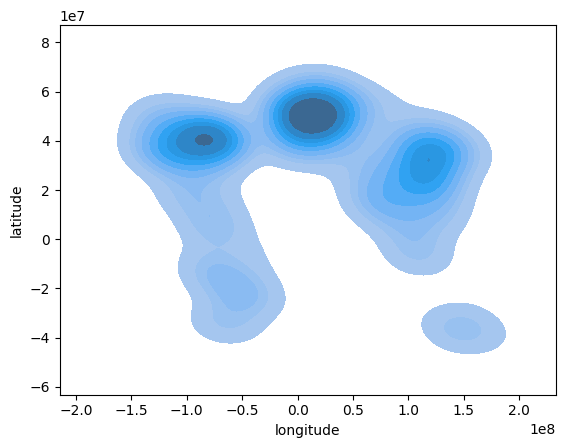

In [14]:
sb.kdeplot(data=comp_dates_df[comp_dates_df['post_covid'] == False], x='longitude', y='latitude', weights='competitors', fill=True)

<Axes: xlabel='longitude', ylabel='latitude'>

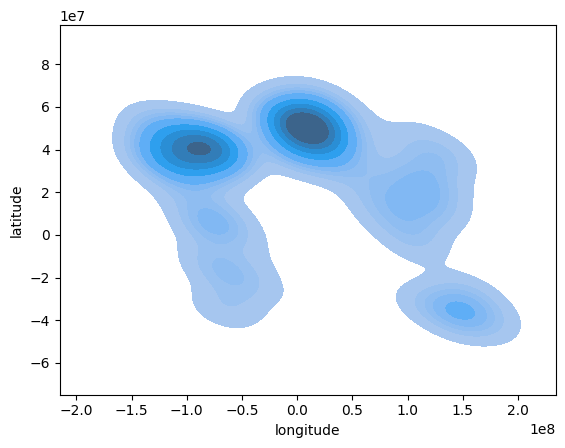

In [15]:
sb.kdeplot(data=comp_dates_df[comp_dates_df['post_covid'] == True], x='longitude', y='latitude', weights='competitors', fill=True)

In [16]:
cube_3x3_df['date'] = cube_3x3_df['competitionId'].map(comp_dates_df.set_index('id')['datetime'])
cube_3x3_df.head()

,competitionId,eventId,roundTypeId,pos,best,average,personName,formatId,value1,value2,value3,value4,value5,personCountryId,date
0,LyonOpen2007,333,1,15,1968,2128,Etienne Amany,a,1968,2203,2138,2139,2108,Cote d_Ivoire,2007-09-01
1,LyonOpen2007,333,1,16,1731,2140,Thomas Rouault,a,2222,2153,1731,2334,2046,France,2007-09-01
2,LyonOpen2007,333,1,17,2305,2637,Antoine Simon-Chautemps,a,3430,2581,2540,2789,2305,France,2007-09-01
3,LyonOpen2007,333,1,18,2452,2637,Irène Mallordy,a,2715,2452,2868,2632,2564,France,2007-09-01
4,LyonOpen2007,333,1,19,2677,2906,Marlène Desmaisons,a,2921,3184,2891,2677,2907,France,2007-09-01


We can also visualize the number of competitors over time. We use a histogram for this because it's a good way to visualize changes in number of data points over time.

<Axes: xlabel='date', ylabel='Count'>

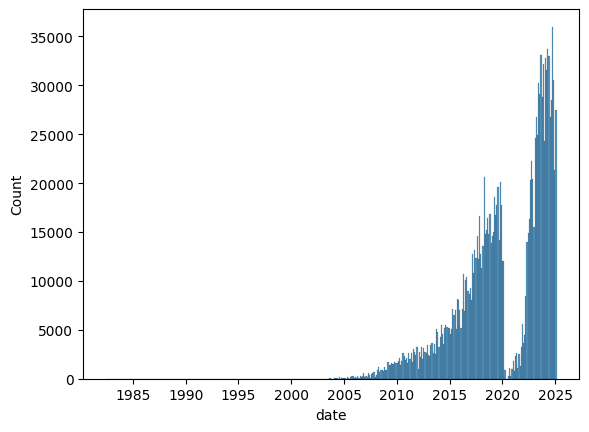

In [17]:
sb.histplot(data=cube_3x3_df, x='date', multiple='stack')

average 3x3 time over the years is also something we can visualize. A scatterplot is good for this becasue it lets us visualize individual datapoints, allowing us to see general trends over time.

We take a smaller sample from the overall data because plotting the whole dataset in this way takes several seconds.

<Axes: xlabel='date', ylabel='average'>

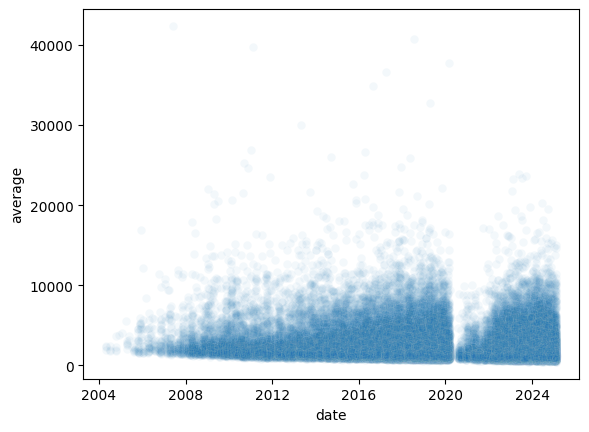

In [18]:
sb.scatterplot(data=cube_3x3_df[cube_3x3_df['average'] > 0].sample(n=100000), x='date', y='average', alpha=0.05)

In [22]:
top_countries = cube_3x3_df['personCountryId'].value_counts().head(5)
top_countries

,count
personCountryId,
USA,335665
China,107348
India,65957
Poland,60325
Australia,57052


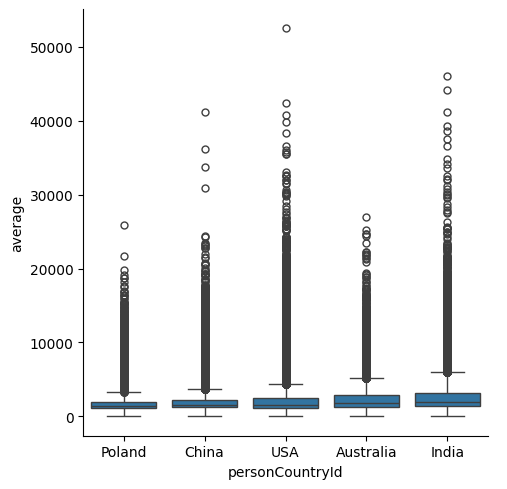

In [21]:
sb.catplot(data=cube_3x3_df[cube_3x3_df['personCountryId'].isin(top_countries.index)], x='personCountryId', y='average', kind='box')